## Data Science for Crime Prediction

### Linear Regression and Random Forest

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

py.init_notebook_mode(connected=True)

### Independent variables

#### City of Toronto Open Data and KSI TPS open data

In [9]:
data = pd.read_csv("1_open_Data\INDICATORS_final.csv")

In [10]:
data

,Neighbourhood,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019,Shape__Area,...,Robbery,Theft Over,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,West Humber-Clairville,1,33312,795.5,1446.9,396.3,6.0,210.1,189.1,3.014532e+07,...,550,310,170,15,6,37,950,0,1,5
1,Mount Olive-Silverstone-Jamestown,2,32954,813.3,267.0,109.2,9.1,166.9,27.3,4.637542e+06,...,462,26,52,13,103,4,1288,1,3,4
2,Thistletown-Beaumond Heights,3,10360,714.3,482.6,125.5,0.0,67.6,29.0,3.339481e+06,...,90,14,31,5,30,9,372,1,3,5
3,Rexdale-Kipling,4,10529,588.8,474.9,142.5,19.0,218.4,28.5,2.505576e+06,...,121,9,29,1,15,3,308,0,3,6
4,Elms-Old Rexdale,5,9456,708.5,296.1,105.8,0.0,148.1,42.3,2.931145e+06,...,81,9,1,4,14,2,358,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,West Hill,136,27392,1573.5,164.3,284.8,7.3,259.2,14.6,9.625440e+06,...,390,38,31,15,26,11,2052,1,1,4
136,Woburn,137,53485,798.4,112.2,187.0,0.0,125.3,15.0,1.233407e+07,...,501,82,161,32,26,27,2594,0,2,7
137,Eglinton East,138,22776,851.8,122.9,254.7,8.8,118.5,35.1,3.223146e+06,...,243,31,57,10,12,4,885,0,2,8
138,Scarborough Village,139,16724,1046.4,107.6,239.2,0.0,167.4,12.0,3.151015e+06,...,150,16,36,2,3,5,788,0,2,5


In [4]:
data.dtypes

Neighbourhood               object
Hood_ID                      int64
Population                   int64
Assault_Rate_2019          float64
AutoTheft_Rate_2019        float64
BreakandEnter_Rate_2019    float64
Homicide_Rate_2019         float64
Robbery_Rate_2019          float64
TheftOver_Rate_2019        float64
Shape__Area                float64
Shape__Length              float64
Assault                      int64
Auto Theft                   int64
Break and Enter              int64
Robbery                      int64
Theft Over                   int64
KSI                          int64
TotalYouthServices           int64
CommunityHousing             int64
PlacesOfWorship              int64
SocialHousing                int64
TPSFacilities_2km            int64
TPSFacilities_5km            int64
TPSFacilities_10km           int64
dtype: object

In [15]:
X = data.iloc[:,[2,16,17,18,19,20,21,22,23]]
X.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,33312,170,15,6,37,950,0,1,5
1,32954,52,13,103,4,1288,1,3,4
2,10360,31,5,30,9,372,1,3,5
3,10529,29,1,15,3,308,0,3,6
4,9456,1,4,14,2,358,0,3,8


In [6]:
X.shape


(140, 9)

In [7]:
X.dtypes

Population            int64
KSI                   int64
TotalYouthServices    int64
CommunityHousing      int64
PlacesOfWorship       int64
SocialHousing         int64
TPSFacilities_2km     int64
TPSFacilities_5km     int64
TPSFacilities_10km    int64
dtype: object

In [8]:
X_numeric_col = list(X.select_dtypes(include=['int64']).columns)
X_numeric_col

['Population',
 'KSI',
 'TotalYouthServices',
 'CommunityHousing',
 'PlacesOfWorship',
 'SocialHousing',
 'TPSFacilities_2km',
 'TPSFacilities_5km',
 'TPSFacilities_10km']

#### Histogram of X features

##### All features are skewed

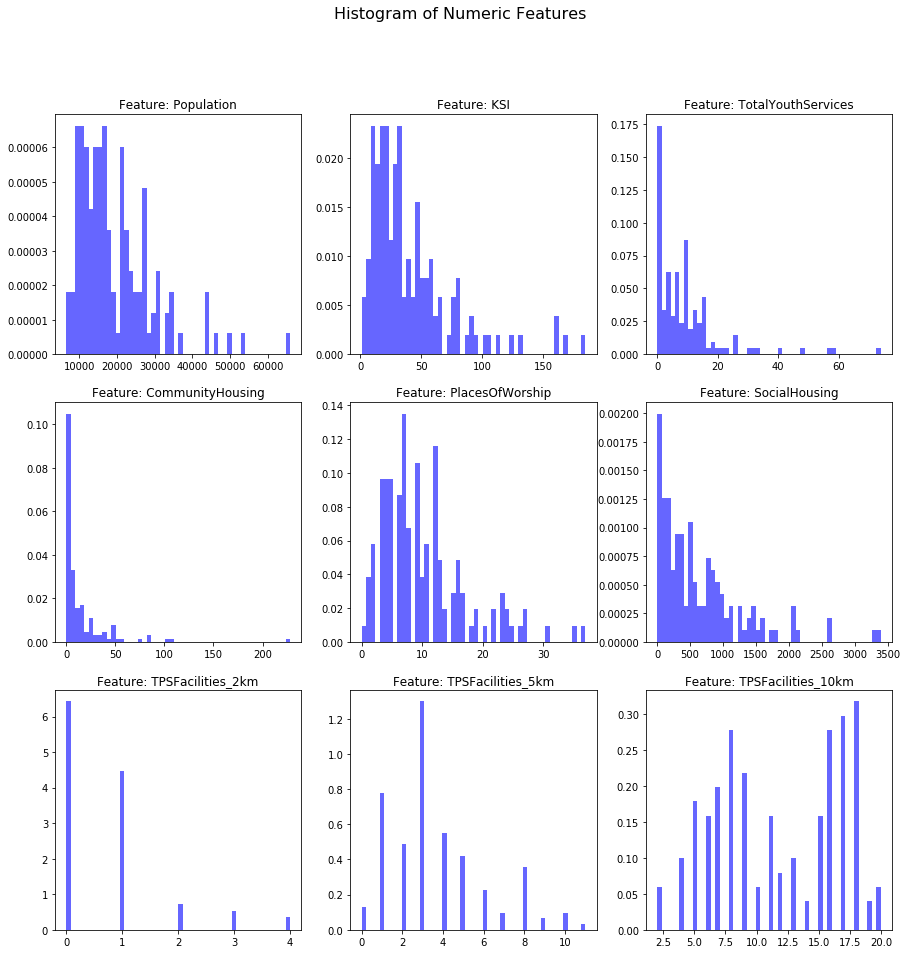

In [9]:
import math

n_num_cols = len(X_numeric_col)
n_subplot_cols = 3
n_subplot_rows = math.ceil(n_num_cols / n_subplot_cols)
fig_width = 5

#print(n_subplot_rows)
#print(n_subplot_cols)

figure, axes = plt.subplots(n_subplot_rows,
                            n_subplot_cols, 
                            figsize=(n_subplot_cols * fig_width, n_subplot_rows * fig_width)
                           )
figure.suptitle('Histogram of Numeric Features', fontsize=16)

if n_subplot_cols > 1 and n_subplot_rows > 1:
    for ix_col in range(n_num_cols):
        ix_ax_row = ix_col // n_subplot_cols 
        ix_ax_col = ix_col % n_subplot_cols
        n, bins, patches = axes[ix_ax_row][ix_ax_col].hist(X.iloc[:,ix_col], 
                                                           bins=50, 
                                                           density=True, ## originally was 'normed=1'
                                                           facecolor='b', 
                                                           alpha=0.6)
        axes[ix_ax_row][ix_ax_col].set_title('Feature: {}'.format(X_numeric_col[ix_col]))
else:
    for ix_col in range(n_num_cols):
        n, bins, patches = axes[ix_col].hist(X.iloc[:,ix_col], 
                                             bins=50, 
                                             normed=1, 
                                             facecolor='b', 
                                             alpha=0.6)
        axes[ix_col].set_title('Feature: {}'.format(X_numeric_col[ix_col]))

plt.show()

#### Histograms of Y dependent variables

In [16]:
y = data.iloc[:,[11,12,13,14,15]]
y

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,1799,2195,826,550,310
1,1516,374,193,462,26
2,320,152,114,90,14
3,412,172,95,121,9
4,325,113,63,81,9
...,...,...,...,...,...
135,2397,159,494,390,38
136,2292,276,628,501,82
137,1117,123,340,243,31
138,1000,103,248,150,16


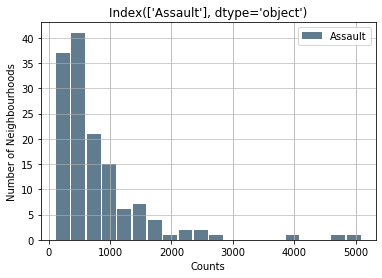

In [56]:
data.iloc[:,[11]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[11]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

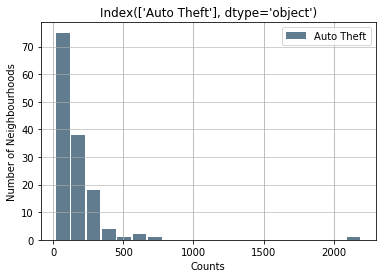

In [57]:
data.iloc[:,[12]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[12]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

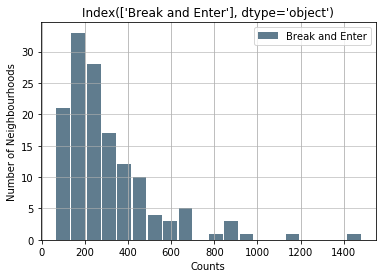

In [58]:
data.iloc[:,[13]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[13]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

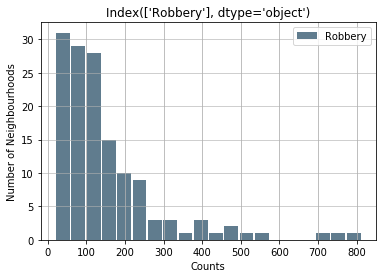

In [59]:
data.iloc[:,[14]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[14]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

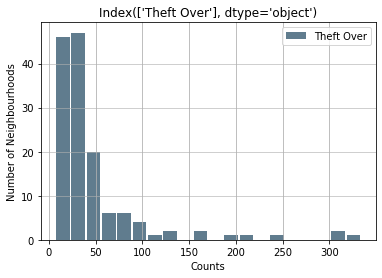

In [60]:
data.iloc[:,[15]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[15]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

### Split data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [22]:
X_train

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
70,11669,34,10,50,7,860,2,5,16
36,16936,13,1,2,4,664,1,1,8
112,17992,30,4,2,12,1036,0,2,11
78,7607,47,11,1,11,326,2,10,15
99,11817,17,15,0,6,0,1,3,18
...,...,...,...,...,...,...,...,...,...
91,14133,28,5,6,9,59,0,6,17
118,27917,161,9,7,22,736,1,5,9
67,11916,25,10,6,5,98,0,5,17
136,53485,161,32,26,27,2594,0,2,7


In [24]:
X_test.shape

(42, 9)

In [25]:
y_train

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
70,610,64,390,123,31
36,608,97,170,123,35
112,1077,283,303,247,26
78,794,52,409,147,48
99,453,54,168,117,28
...,...,...,...,...,...
91,506,69,170,145,22
118,1186,376,561,202,82
67,386,73,241,159,26
136,2292,276,628,501,82


## save test and train sets 

In [29]:
#pd.DataFrame(X_train).to_csv("2_Output/3_test_train_No_TOD/X_train.csv")
#pd.DataFrame(X_test).to_csv("2_Output/3_test_train_No_TOD/X_test.csv")
#pd.DataFrame(y_train).to_csv("2_Output/3_test_train_No_TOD/y_train.csv")
#pd.DataFrame(y_test).to_csv("2_Output/3_test_train_No_TOD/y_test.csv")

## Read Test and Train sets

In [5]:
X_train = pd.read_csv("2_Output/3_test_train_No_TOD/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/3_test_train_No_TOD/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/3_test_train_No_TOD/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/3_test_train_No_TOD/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [6]:
X_train.head()


,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,11669,34,10,50,7,860,2,5,16
1,16936,13,1,2,4,664,1,1,8
2,17992,30,4,2,12,1036,0,2,11
3,7607,47,11,1,11,326,2,10,15
4,11817,17,15,0,6,0,1,3,18


In [15]:
X_test.head()


,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,18675,11,0,0,11,528,1,3,11
1,11499,13,3,0,7,154,0,6,18
2,22372,16,5,108,11,2104,1,4,16
3,9233,35,0,0,3,182,0,2,16
4,9456,1,4,14,2,358,0,3,8


In [16]:
y_train.head()


,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,610,64,390,123,31
1,608,97,170,123,35
2,1077,283,303,247,26
3,794,52,409,147,48
4,453,54,168,117,28


In [17]:
y_test.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,909,99,239,121,38
1,391,32,106,56,7
2,619,171,275,138,36
3,275,25,116,46,14
4,325,113,63,81,9


In [ ]:
## Linear Regression

In [106]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, r2_score

ImportError: cannot import name 'mse_model' from 'statsmodels.tools.eval_measures' (C:\Users\maris\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py)

In [114]:
def OLS (X,y):
    # Add constant to get intercept
    X_Sm= sm.add_constant(X)
    
    #Fit OLS
    ls=sm.OLS(y,X_Sm).fit()
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    #Predictions
    ypred = ls.predict(X_Sm)
    #print(ypred)
    
    #Print results
    print(ls.summary())

    print('MSE', mean_squared_error(y, ypred))
    
    return

In [115]:
assault_OLS = OLS(X_train,y_train.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     53.90
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.11e-32
Time:                        19:10:34   Log-Likelihood:                -709.16
No. Observations:                  98   AIC:                             1438.
Df Residuals:                      88   BIC:                             1464.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 89.1866    147

In [75]:
AutoTheft_OLS = OLS(X_train, y_train.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     12.38
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.86e-12
Time:                        21:53:51   Log-Likelihood:                -637.13
No. Observations:                  98   AIC:                             1294.
Df Residuals:                      88   BIC:                             1320.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                102.1888     70

In [76]:
BreakEnter_OLS = OLS(X_train, y_train.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     41.56
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           5.75e-28
Time:                        21:54:21   Log-Likelihood:                -590.16
No. Observations:                  98   AIC:                             1200.
Df Residuals:                      88   BIC:                             1226.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 40.3279     43

In [77]:
Robbery_OLS = OLS(X_train, y_train.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     55.31
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.98e-32
Time:                        21:54:59   Log-Likelihood:                -538.87
No. Observations:                  98   AIC:                             1098.
Df Residuals:                      88   BIC:                             1124.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 66.9715     25

In [78]:
TheftOver_OLS = OLS(X_train, y_train.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     26.19
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.52e-21
Time:                        21:55:37   Log-Likelihood:                -479.76
No. Observations:                  98   AIC:                             979.5
Df Residuals:                      88   BIC:                             1005.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.1210     14

## Remove Population 

In [18]:
X_train_2 = X_train.iloc[:,[1,2,3,4,5,6,7,8]]
X_train_2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,34,10,50,7,860,2,5,16
1,13,1,2,4,664,1,1,8
2,30,4,2,12,1036,0,2,11
3,47,11,1,11,326,2,10,15
4,17,15,0,6,0,1,3,18
...,...,...,...,...,...,...,...,...
93,28,5,6,9,59,0,6,17
94,161,9,7,22,736,1,5,9
95,25,10,6,5,98,0,5,17
96,161,32,26,27,2594,0,2,7


In [19]:
X_test_2 = X_test.iloc[:,[1,2,3,4,5,6,7,8]]
X_test_2.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,11,0,0,11,528,1,3,11
1,13,3,0,7,154,0,6,18
2,16,5,108,11,2104,1,4,16
3,35,0,0,3,182,0,2,16
4,1,4,14,2,358,0,3,8


In [83]:
assault_OLS = OLS(X_train_2, y_train.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     56.22
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.56e-31
Time:                        21:58:31   Log-Likelihood:                -712.74
No. Observations:                  98   AIC:                             1443.
Df Residuals:                      89   BIC:                             1467.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                306.9538    124

In [84]:
AutoTheft_OLS = OLS(X_train_2, y_train.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.55e-12
Time:                        21:58:49   Log-Likelihood:                -638.51
No. Observations:                  98   AIC:                             1295.
Df Residuals:                      89   BIC:                             1318.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 38.1663     58

In [85]:
BreakEnter_OLS = OLS(X_train_2, y_train.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     43.10
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.09e-27
Time:                        22:00:15   Log-Likelihood:                -593.81
No. Observations:                  98   AIC:                             1206.
Df Residuals:                      89   BIC:                             1229.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                105.5883     37

In [86]:
Robbery_OLS = OLS(X_train_2, y_train.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     62.93
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.40e-33
Time:                        22:00:27   Log-Likelihood:                -538.87
No. Observations:                  98   AIC:                             1096.
Df Residuals:                      89   BIC:                             1119.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 66.7995     21

In [87]:
TheftOver_OLS = OLS(X_train_2, y_train.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     29.80
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           4.46e-22
Time:                        22:00:48   Log-Likelihood:                -479.77
No. Observations:                  98   AIC:                             977.5
Df Residuals:                      89   BIC:                             1001.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.2990     11

##  Random Forest

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
explained_variance_score, r2_score,\
mean_squared_log_error, median_absolute_error, mean_poisson_deviance,\
mean_gamma_deviance, max_error,\
accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import statsmodels.api as sm

In [97]:
def rfr_model (X_train_2, y_train,y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),\
        param_grid={ \
            'max_depth': range(3,7),\
            'n_estimators': (10, 15, 25, 50, 75, 100, 500, 1000),\
        },\
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train_2, y_train)
    best_params = grid_result.best_params_
    print('Best Parameters', best_params)
    
    # Instatiate random forsest regressor using results from grid search
    rfr=RandomForestRegressor(max_depth=best_params["max_depth"],\
                                n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
    # Fit model to data
    rfr.fit(X_train_2, y_train)
    
    # Predict values
    prediction = rfr.predict(X_test_2)
    #print('Predictions', prediction)
    
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, prediction)
    print('Mean Absolute Error', mae)
    
    mse_test = mean_squared_error(y_test, prediction)
    print('Mean Squared Error', mse_test)
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    # Obtain Feature Importance
    importances = rfr.feature_importances_
    
    features = list(X_test_2.columns)
    
    print('Feature Importance Coeff:', (features, importances))
    
    # Feature Importance chart
    feat_importances = pd.Series(rfr.feature_importances_, index=X_test_2.columns)
    feat_importances.nlargest(20).plot(kind='barh')
  
    
    return rfr

Best Parameters {'max_depth': 3, 'n_estimators': 25}
Mean Absolute Error 265.0284164633345
Mean Squared Error 102856.00006429285
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km', 'TPSFacilities_5km', 'TPSFacilities_10km'], array([0.2040274 , 0.57097115, 0.01477148, 0.0313813 , 0.14210097,
       0.00578125, 0.0190598 , 0.01190665]))


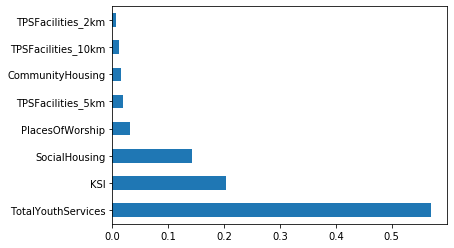

In [98]:
assault = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         y_test.iloc[:,[0]])

Best Parameters {'max_depth': 6, 'n_estimators': 25}
Mean Absolute Error 103.17258172902864
Mean Squared Error 51563.97979256626
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km', 'TPSFacilities_5km', 'TPSFacilities_10km'], array([0.20774551, 0.03000025, 0.02898982, 0.67136596, 0.01718707,
       0.00661426, 0.01344193, 0.0246552 ]))


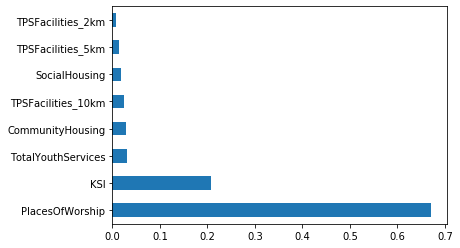

In [99]:
AutoTheft = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[1]]),\
                         y_test.iloc[:,[1]])

Best Parameters {'max_depth': 5, 'n_estimators': 15}
Mean Absolute Error 111.35796509778339
Mean Squared Error 21652.982932632764
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km', 'TPSFacilities_5km', 'TPSFacilities_10km'], array([0.63140628, 0.16182897, 0.01088593, 0.08724688, 0.0435321 ,
       0.00781884, 0.03864401, 0.01863699]))


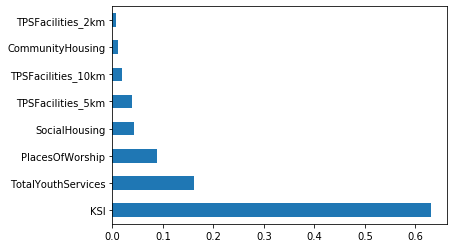

In [100]:
BreakEnter = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[2]]),\
                         y_test.iloc[:,[2]])

Best Parameters {'max_depth': 3, 'n_estimators': 15}
Mean Absolute Error 67.74173318726265
Mean Squared Error 9630.864495349482
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km', 'TPSFacilities_5km', 'TPSFacilities_10km'], array([0.27653577, 0.50384406, 0.00634974, 0.02410446, 0.13658736,
       0.        , 0.00461945, 0.04795915]))


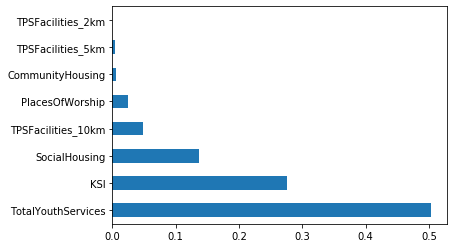

In [101]:
Robbery = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         y_test.iloc[:,[3]])

Best Parameters {'max_depth': 3, 'n_estimators': 15}
Mean Absolute Error 17.688284560363275
Mean Squared Error 716.8049549550427
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km', 'TPSFacilities_5km', 'TPSFacilities_10km'], array([0.69006458, 0.14762706, 0.02455238, 0.10125322, 0.02112076,
       0.00583184, 0.00416623, 0.00538392]))


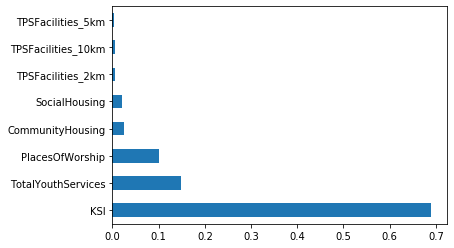

In [102]:
TheftOVer = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[4]]),\
                         y_test.iloc[:,[4]])

## Removed Population, Time of Day and TPS Facilities

In [40]:
X_train_3 = X_train.iloc[:,[1,2,3,4,5]]
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


In [41]:
X_test_3 = X_test.iloc[:,[1,2,3,4,5]]
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,11,0,0,11,528
1,13,3,0,7,154
2,16,5,108,11,2104
3,35,0,0,3,182
4,1,4,14,2,358


### Iteration #3 Linear Regression - Population and TPS Facilities removed

In [91]:
assault_OLS_3 = OLS(X_train_3, y_train.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     89.25
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           9.51e-34
Time:                        18:29:19   Log-Likelihood:                -714.41
No. Observations:                  98   AIC:                             1441.
Df Residuals:                      92   BIC:                             1456.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                147.4236     71

In [92]:
AutoTheft_OLS_3 = OLS(X_train_3, y_train.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     19.35
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.08e-13
Time:                        18:31:46   Log-Likelihood:                -642.01
No. Observations:                  98   AIC:                             1296.
Df Residuals:                      92   BIC:                             1312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -54.5913     34

In [93]:
BreakEnter_OLS_3 = OLS(X_train_3, y_train.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     69.98
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           7.76e-30
Time:                        18:33:09   Log-Likelihood:                -594.53
No. Observations:                  98   AIC:                             1201.
Df Residuals:                      92   BIC:                             1217.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 98.3252     21

In [94]:
Robbery_OLS_3 = OLS(X_train_3, y_train.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     91.45
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.77e-34
Time:                        18:36:09   Log-Likelihood:                -544.21
No. Observations:                  98   AIC:                             1100.
Df Residuals:                      92   BIC:                             1116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.0861     12

In [95]:
TheftOver_OLS_3 = OLS(X_train_3, y_train.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     49.21
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.54e-24
Time:                        18:38:52   Log-Likelihood:                -479.82
No. Observations:                  98   AIC:                             971.6
Df Residuals:                      92   BIC:                             987.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.8347      6

## Iteration #3 - Random Forest Population and TPS Facilities removed

In [124]:
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
70,34,10,50,7,860
36,13,1,2,4,664
112,30,4,2,12,1036
78,47,11,1,11,326
99,17,15,0,6,0
...,...,...,...,...,...
91,28,5,6,9,59
118,161,9,7,22,736
67,25,10,6,5,98
136,161,32,26,27,2594


In [126]:
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
53,11,0,0,11,528
56,13,3,0,7,154
31,16,5,108,11,2104
57,35,0,0,3,182
4,1,4,14,2,358


In [120]:
def rfr_model3 (X_train_3, y_train,y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),\
        param_grid={ \
            'max_depth': range(3,7),\
            'n_estimators': (10, 15, 25, 50, 75, 100, 500, 1000),\
        },\
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train_3, y_train)
    best_params = grid_result.best_params_
    print('Best Parameters', best_params)
    
    # Instatiate random forsest regressor using results from grid search
    rfr=RandomForestRegressor(max_depth=best_params["max_depth"],\
                                n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
    # Fit model to data
    rfr.fit(X_train_3, y_train)
    
    # Predict values
    prediction = rfr.predict(X_test_3)
    #print('Predictions', prediction)
    
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, prediction)
    print('Mean Absolute Error', mae)
    
    mse_test = mean_squared_error(y_test, prediction)
    print('Mean Squared Error', mse_test)
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    # Obtain Feature Importance
    importances = rfr.feature_importances_
    
    features = list(X_test_3.columns)
    
    print('Feature Importance Coeff:', (features, importances))
    
    # Feature Importance chart
    feat_importances = pd.Series(rfr.feature_importances_, index=X_test_3.columns)
    feat_importances.nlargest(20).plot(kind='barh')
  
    
    return rfr

Best Parameters {'max_depth': 4, 'n_estimators': 25}
Mean Absolute Error 259.29829957335414
Mean Squared Error 113180.3699114763
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.21647607, 0.59838733, 0.01551451, 0.0383252 , 0.13129689]))


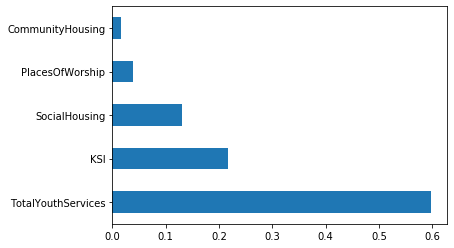

In [128]:
Assaults = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         y_test.iloc[:,[0]])

Best Parameters {'max_depth': 3, 'n_estimators': 15}
Mean Absolute Error 98.4399822106044
Mean Squared Error 40341.69353158205
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.26459059, 0.02155124, 0.02943024, 0.66981182, 0.0146161 ]))


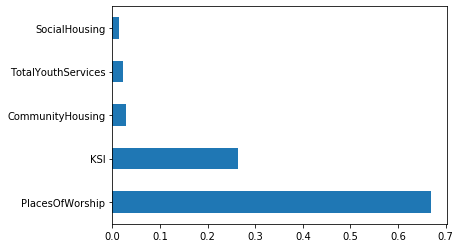

In [127]:
AutoTheft = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[1]]),\
                         y_test.iloc[:,[1]])

Best Parameters {'max_depth': 4, 'n_estimators': 25}
Mean Absolute Error 104.77306354482577
Mean Squared Error 18458.815621732258
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.63311548, 0.21541352, 0.01220068, 0.08419214, 0.05507818]))


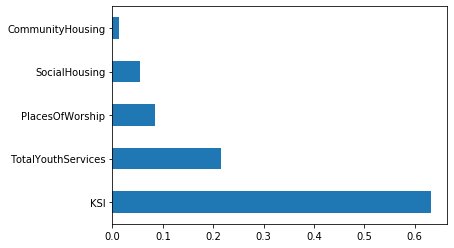

In [129]:
BreakEnter = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[2]]),\
                         y_test.iloc[:,[2]])

Best Parameters {'max_depth': 4, 'n_estimators': 15}
Mean Absolute Error 59.72880822740243
Mean Squared Error 6671.896783579392
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.2968859 , 0.56111058, 0.02098564, 0.02165514, 0.09936274]))


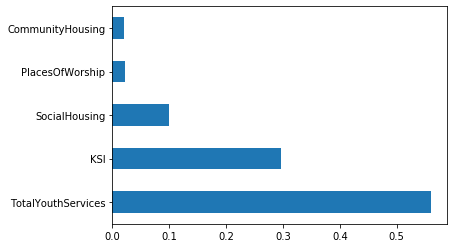

In [130]:
Robbery = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         y_test.iloc[:,[3]])

Best Parameters {'max_depth': 5, 'n_estimators': 15}
Mean Absolute Error 58.12438152184755
Mean Squared Error 6424.658300067195
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.28654102, 0.56385845, 0.01868263, 0.03269346, 0.09822444]))


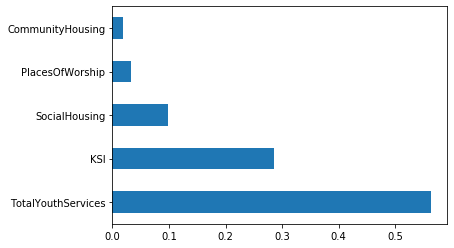

In [131]:
TheftOver = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         y_test.iloc[:,[3]])